### K mean clustering 

In [101]:
## Import all the libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [86]:
df = pd.read_csv('../data/PreProcessed/MixWine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_name
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Let's perform K-means clustering with 9 clusters, considering the 9 types of wine quality using all the features in the dataset.

### K mean clustering using 9 Clusters and Let's see how cluster look like

In [95]:
df["wine_name"]=df["wine_name"].replace({"red":0,"white":1})
kmeans = KMeans(n_clusters=9, random_state=0, n_init=1000)
kmeans.fit(df)

KMeans(n_clusters=9, n_init=1000, random_state=0)

### Get the Centroids of the cluster

In [96]:
centroids = kmeans.cluster_centers_
centroids

array([[ 8.43951515e+00,  5.12515152e-01,  2.70654545e-01,
         2.39442424e+00,  8.25321212e-02,  8.83636364e+00,
         2.22690909e+01,  9.96457018e-01,  3.30498182e+00,
         6.38460606e-01,  1.06100202e+01,  5.71636364e+00,
         3.15151515e-02,  7.00000000e+00],
       [ 7.11687840e+00,  3.10000000e-01,  3.43375681e-01,
         7.61206897e+00,  5.09528131e-02,  3.05036298e+01,
         1.69165154e+02,  9.95395499e-01,  3.19188748e+00,
         5.04646098e-01,  1.01167877e+01,  5.66606171e+00,
         9.96370236e-01,  8.00000000e+00],
       [ 6.83321555e+00,  2.82857774e-01,  3.19796820e-01,
         4.82234982e+00,  4.51484099e-02,  2.94646643e+01,
         1.11635601e+02,  9.93083489e-01,  3.19967314e+00,
         4.95450530e-01,  1.09052562e+01,  6.03533569e+00,
         9.32862191e-01,  3.00000000e+00],
       [ 6.73270799e+00,  2.50685155e-01,  3.46835237e-01,
         7.64665579e+00,  4.89233279e-02,  5.23939641e+01,
         1.50482055e+02,  9.94710334e-01,  3.

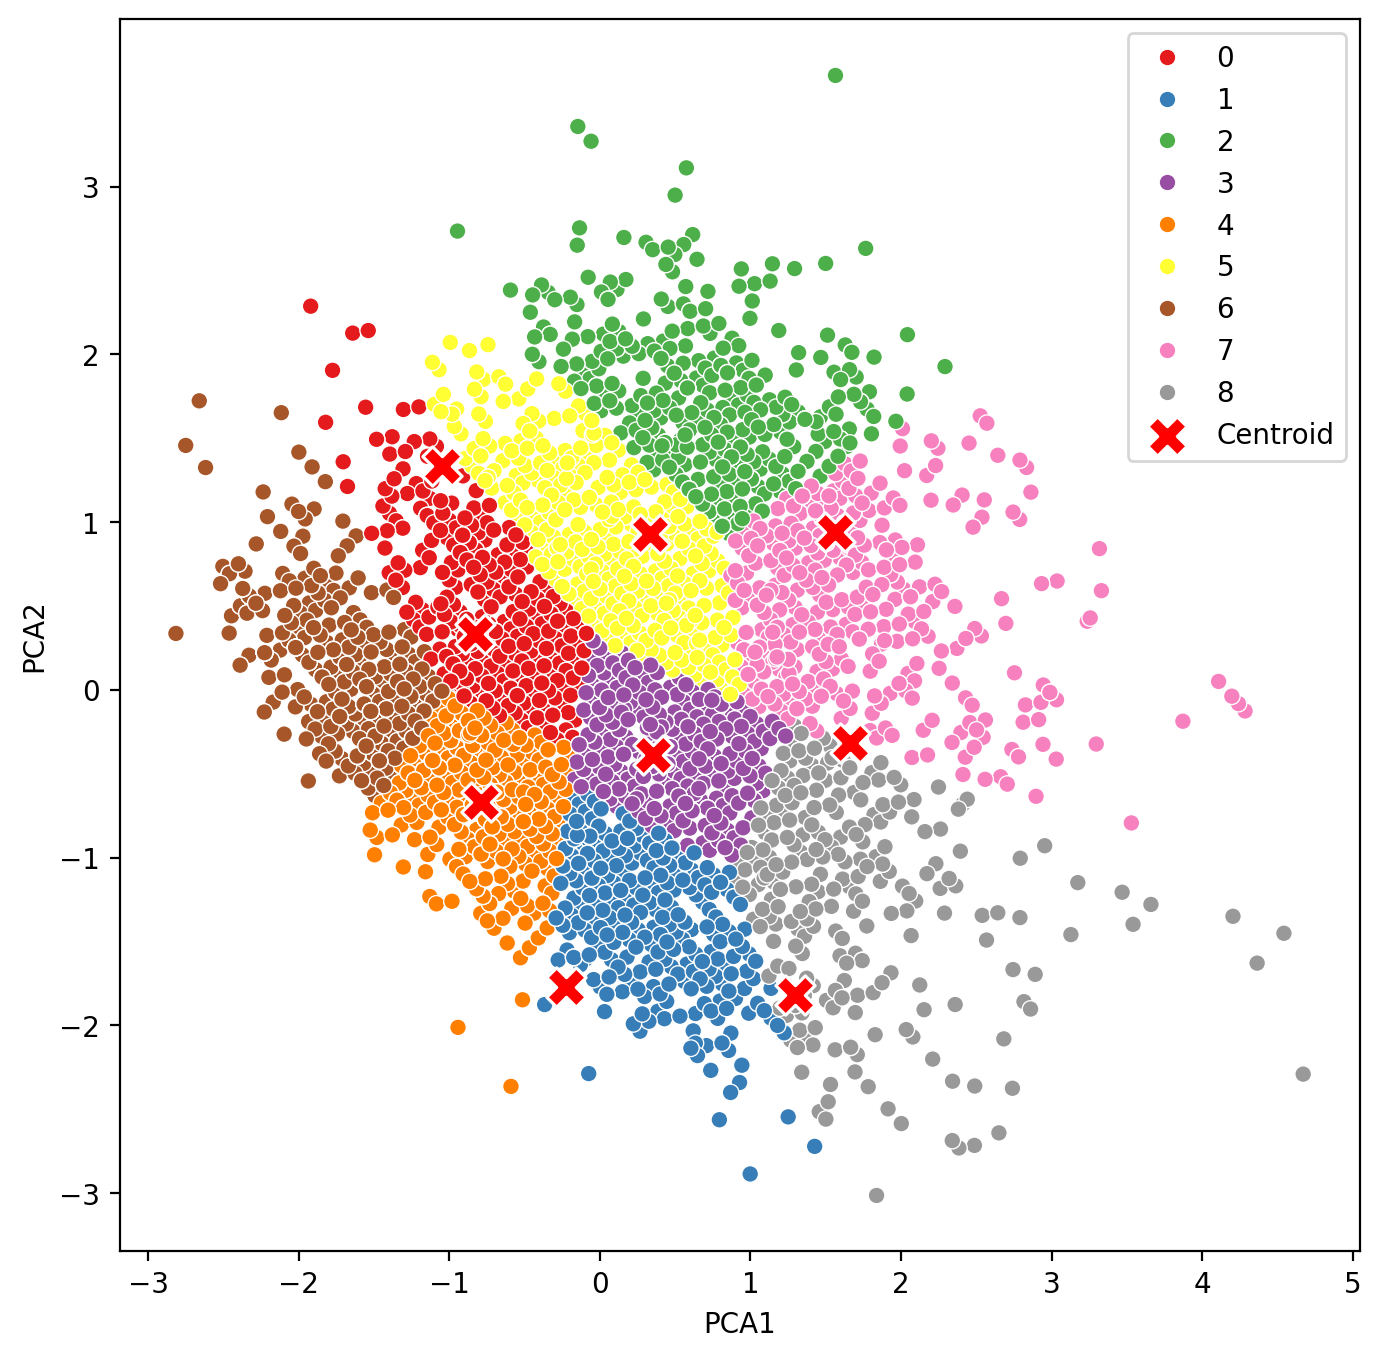

In [102]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.iloc[:, :-1])

# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=['PCA1', 'PCA2'])
X_pca['cluster'] = X['cluster']

# Fit k-means on the standardized and reduced data
kmeans_pca = KMeans(n_clusters=9, random_state=0, n_init=1000, init='k-means++')
kmeans_pca.fit(X_pca[['PCA1', 'PCA2']])

# Get cluster centroids in the reduced space
centroids_pca = pca.transform(kmeans_pca.cluster_centers_)

# Convert centroids to a DataFrame
centroids_df = pd.DataFrame(centroids_pca, columns=['X', 'Y'])

# Add the centroids to the plot
plt.figure(figsize=(8, 8), dpi=200)

# Visualize the clusters in the reduced 2D space
sns.scatterplot(data=X_pca, x='PCA1', y='PCA2', hue='cluster', palette='Set1')
sns.scatterplot(data=centroids_df, x='X', y='Y', marker='X', s=200, color='red', label='Centroid')

plt.legend()
plt.show()

#### Principal Component Analysis is a technique that transforms high-dimensions data into lower-dimension while retaining as much information as possible.
> Minimize the dataset from 15 features to 2 features using principal component analysis (PCA).
> Represent the cluster plot based on PCA1 and PCA2. Differentiate clusters by passing a color parameter as c=kmeans.labels_


##### As we can see, it doesn't appear to form a clear cluster. Therefore, we can use different methods such as the Elbow Method or Silhouette Score to identify the proper number of clusters.

### Let's see Average Silhouette Score for 9 clusters

In [103]:
silhouette_avg = silhouette_score(X_scaled, kmeans_pca.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.34133689532698097


## *In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set*

### For elbow method, we should plot sse(sum of squared errors) vs different k values and check the point where elbow is formed

In [104]:
sse = [] ## sum of squared errors
k_range = range(2,15)
score = []
for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init='auto')
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)
    score.append(silhouette_score(X_train, kmeans.labels_, metric='euclidean'))
score

[0.509178905446802,
 0.505330574898596,
 0.4526368160009388,
 0.4155074621544081,
 0.3826991632931067,
 0.3745053043552785,
 0.3567370819309261,
 0.3302892694334823,
 0.33269082165166314,
 0.33466705696326454,
 0.3304825703095428,
 0.3217370648610587,
 0.30738164734296913]

[Text(0.5, 0, 'no of clusters'),
 Text(0, 0.5, 'SSE(Sum of squared error)'),
 Text(0.5, 1.0, 'sse vs number of clusters')]

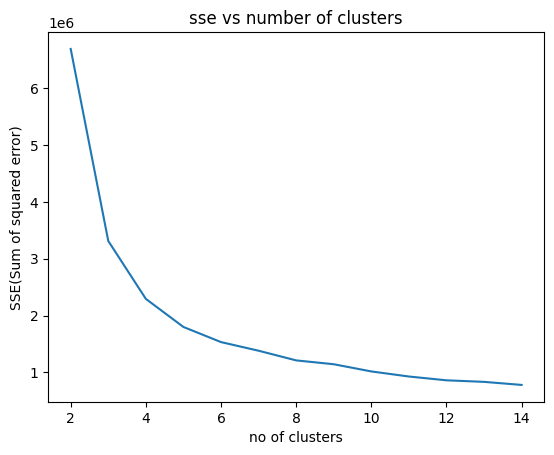

In [105]:
sseplot = sns.lineplot(x = k_range, y = sse)
sseplot.set(xlabel ="no of clusters", ylabel = "SSE(Sum of squared error)", title ="sse vs number of clusters")

### Here Elbow method suggest k should be 3, 4 or 5 but we should check with silhouette coefficient as well

### Let's see different silhouette score for different number of cluster

In [108]:
for n_clusters in range(2, 10):  # Start from 2 clusters
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg}")

For n_clusters = 2, The average silhouette_score is: 0.509178905446802
For n_clusters = 3, The average silhouette_score is: 0.505330574898596
For n_clusters = 4, The average silhouette_score is: 0.4520383241544465
For n_clusters = 5, The average silhouette_score is: 0.41620959365955623
For n_clusters = 6, The average silhouette_score is: 0.3829943960668417
For n_clusters = 7, The average silhouette_score is: 0.3618851596183886
For n_clusters = 8, The average silhouette_score is: 0.35676771933129964
For n_clusters = 9, The average silhouette_score is: 0.3564515028487592


For n_clusters = 2 The average silhouette_score is : 0.5076566041068334
For n_clusters = 3 The average silhouette_score is : 0.5027911019016846
For n_clusters = 4 The average silhouette_score is : 0.44705179437543724
For n_clusters = 5 The average silhouette_score is : 0.4161135066603677
For n_clusters = 6 The average silhouette_score is : 0.3819402236486423
For n_clusters = 7 The average silhouette_score is : 0.3631360945472117
For n_clusters = 8 The average silhouette_score is : 0.36110919593308055
For n_clusters = 9 The average silhouette_score is : 0.34820977888952803


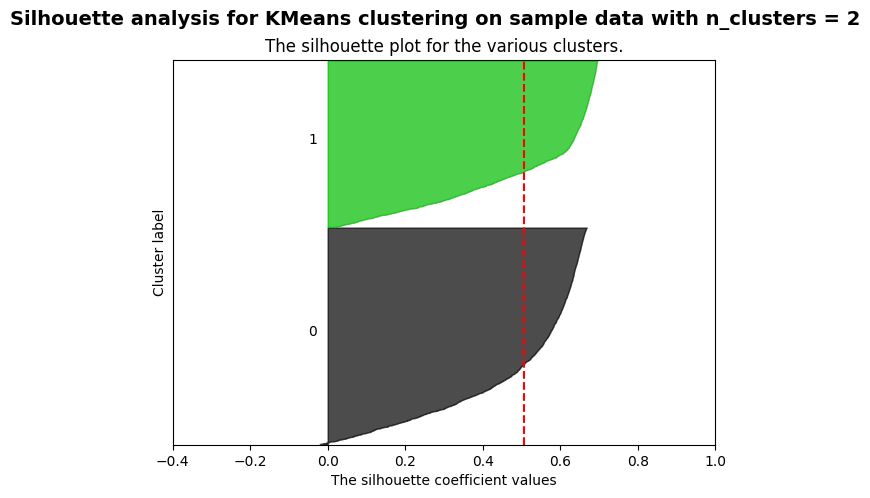

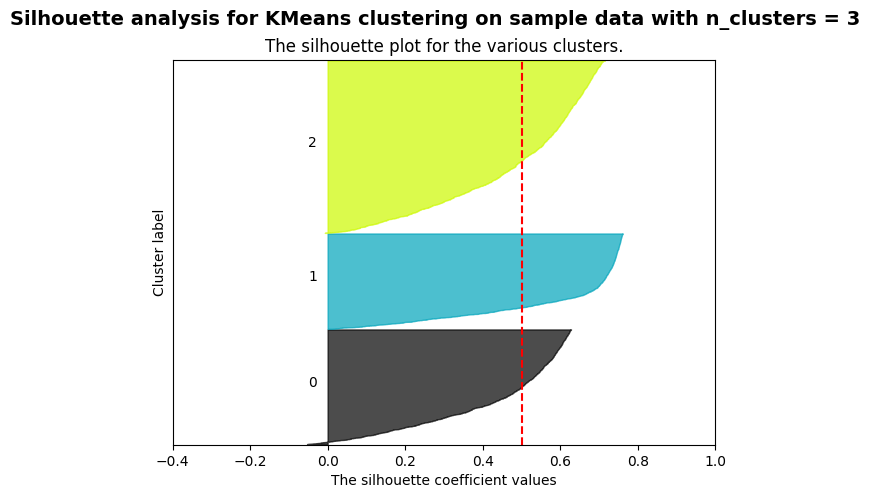

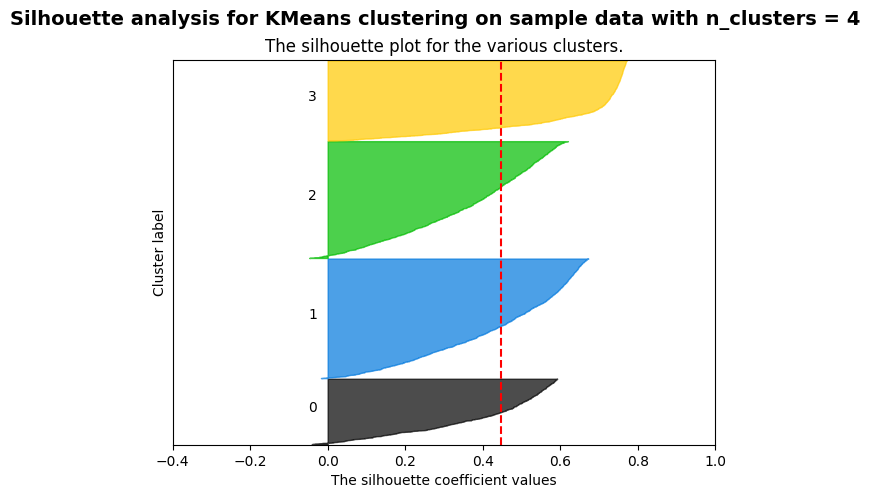

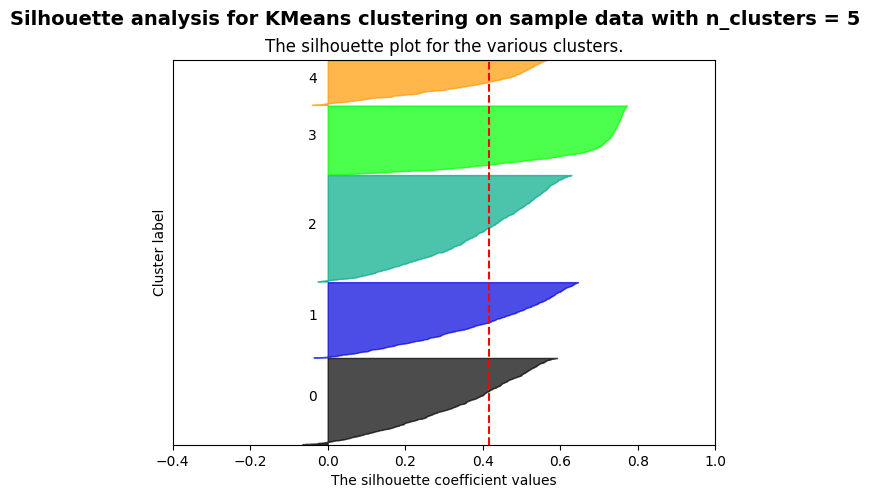

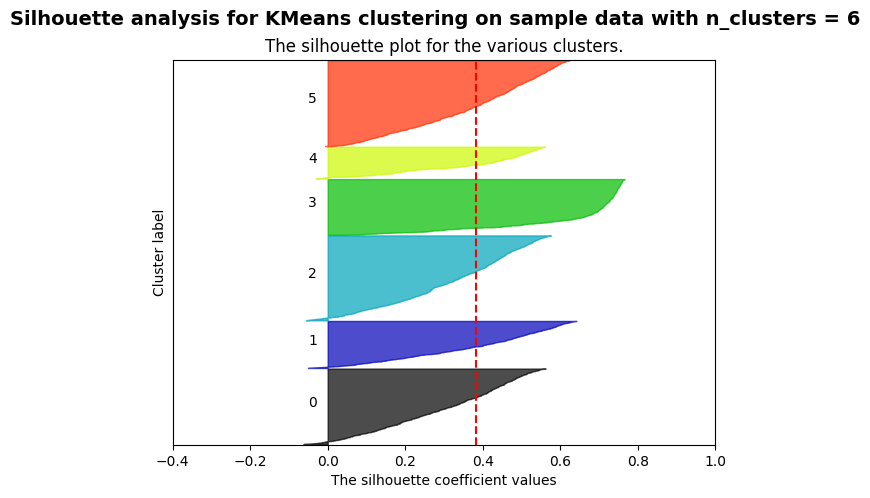

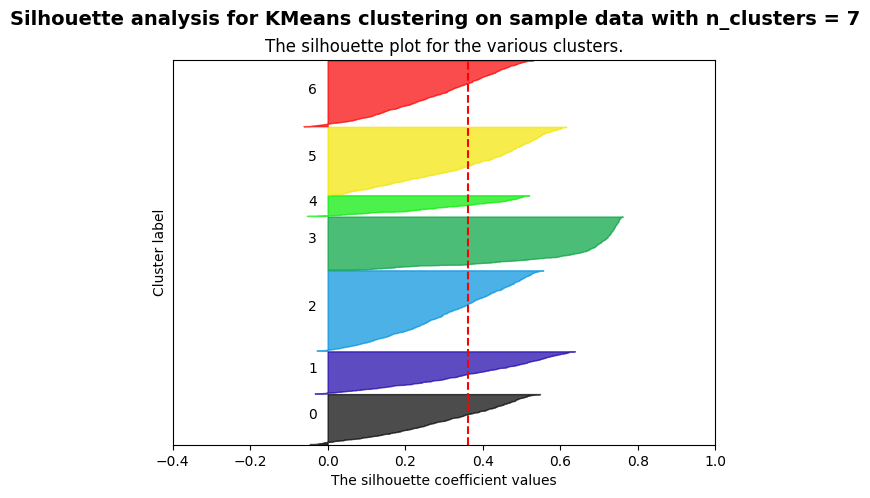

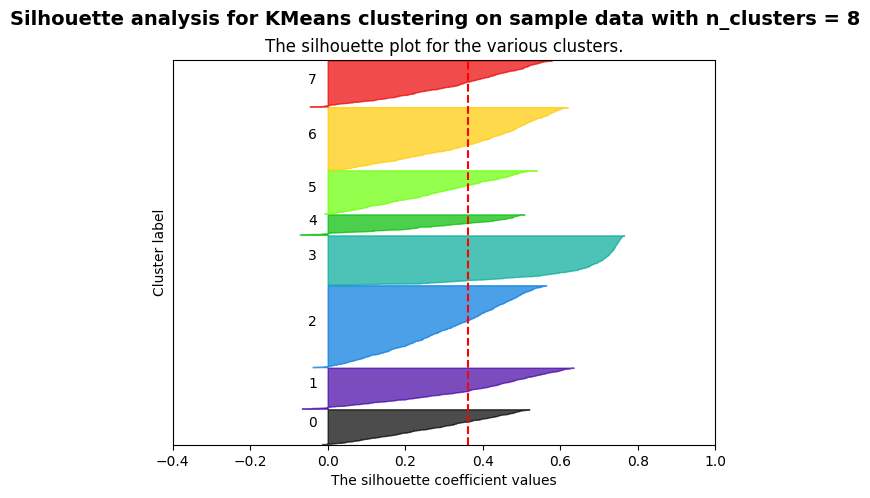

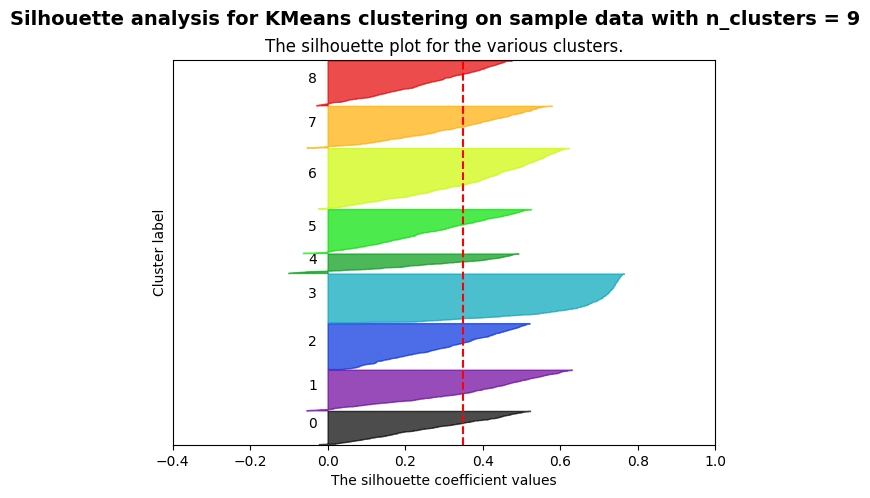

In [111]:
def visualize_silhouette(X, range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot for the silhouette plot
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(7, 5)

        # The silhouette coefficient can range from -1 to 1, but in this example, all
        # lie within [-0.4, 1]
        ax1.set_xlim([-0.4, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for the next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for the average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the y-axis labels / ticks
        ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

# Example usage
X_encoded = pd.get_dummies(df) 
visualize_silhouette(X_encoded, range_n_clusters=range(2, 10))

### According to the silhouette score and the Elbow Method, the optimal number of clusters should be 3, as the average silhouette score is 0.85, which is the highest for 3 clusters.

### Now let's take K mean clustering using 3 Clusters and Let's see how cluster look like 

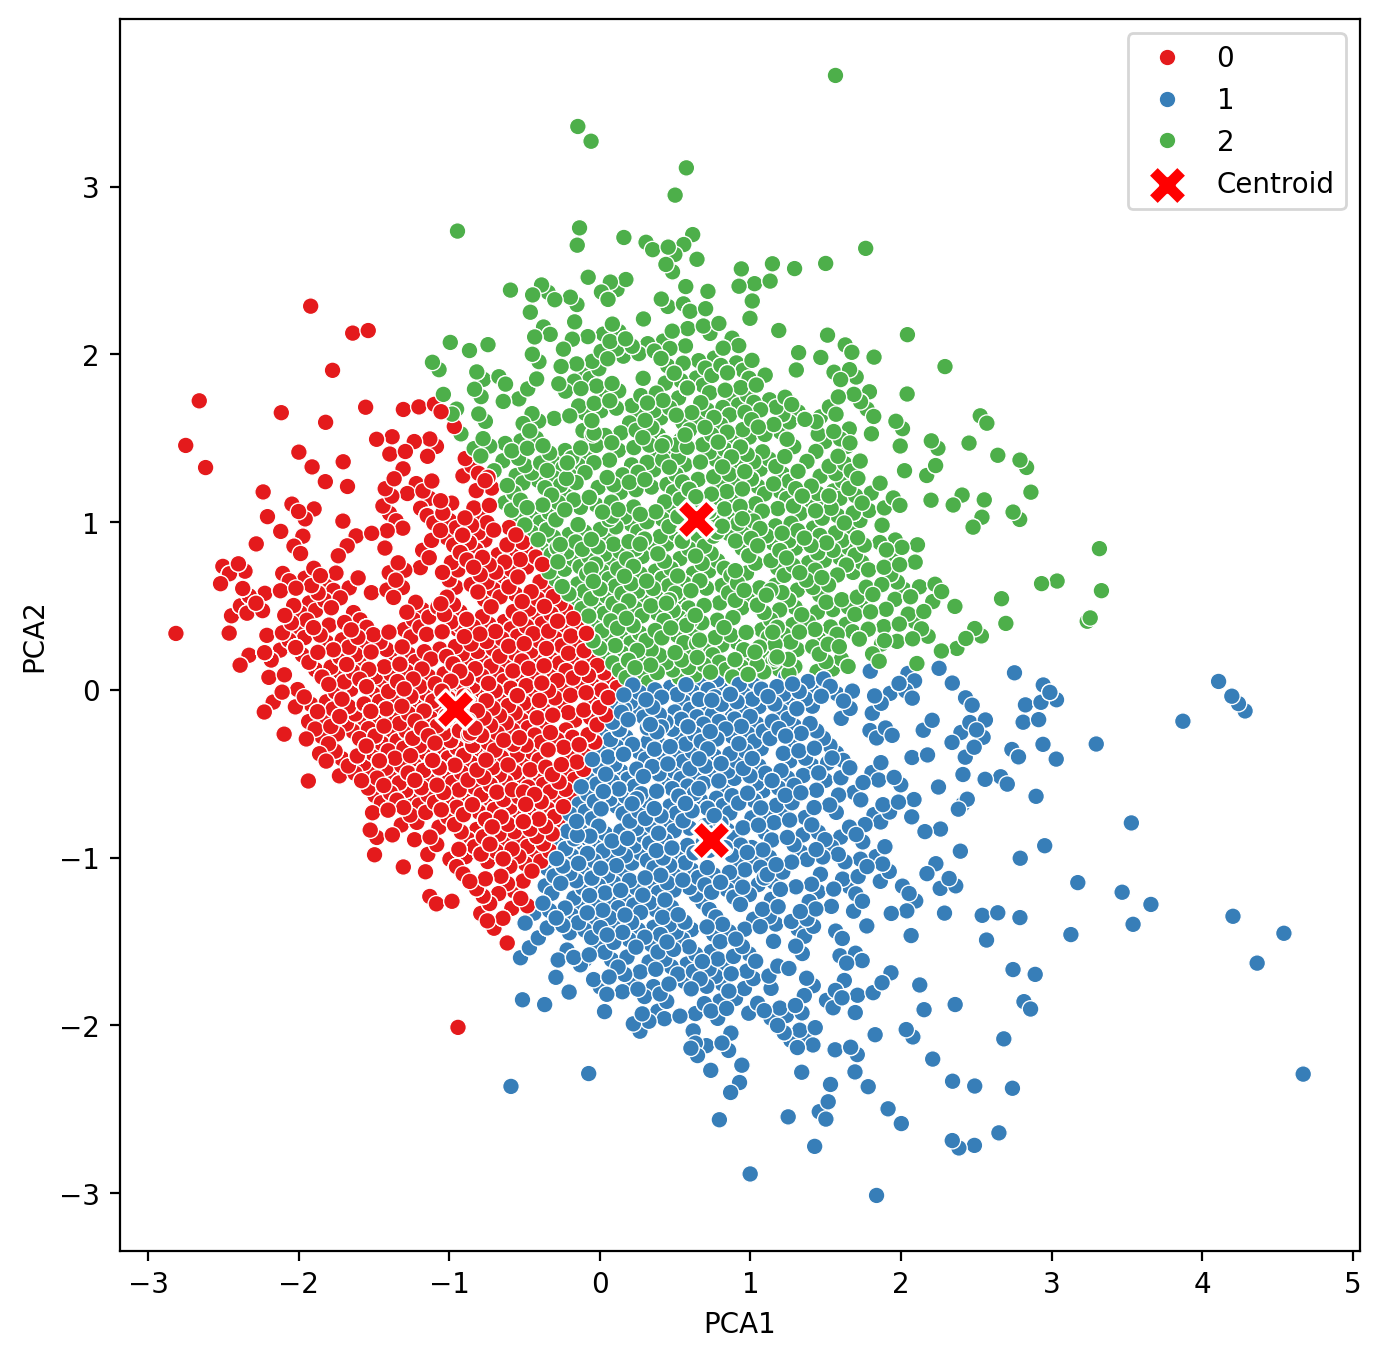

In [114]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.iloc[:, :-1])

# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=['PCA1', 'PCA2'])

# Fit k-means on the standardized and reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=0, n_init=1000, init='k-means++')
X_pca['cluster'] = kmeans_pca.fit_predict(X_scaled)

# Get cluster centroids in the reduced space
centroids_pca = pca.transform(kmeans_pca.cluster_centers_)

# Convert centroids to a DataFrame
centroids_df = pd.DataFrame(centroids_pca, columns=['X', 'Y'])

# Add the centroids to the plot
plt.figure(figsize=(8, 8), dpi=200)

# Visualize the clusters in the reduced 2D space
sns.scatterplot(data=X_pca, x='PCA1', y='PCA2', hue='cluster', palette='Set1')
sns.scatterplot(data=centroids_df, x='X', y='Y', marker='X', s=200, color='red', label='Centroid')

plt.legend()
plt.show()


In [117]:
centroids = kmeans_pca.cluster_centers_
centroids

array([[-0.60011771, -0.76086174],
       [ 1.15621531, -0.11327402],
       [-0.27045774,  1.16868747]])

In [119]:
silhouette_avg = silhouette_score(X_scaled, X_pca['cluster'])
print(f"The average silhouette_score is: {silhouette_avg}")

The average silhouette_score is: 0.3931591982917083


## It's clear that the number of clusters should be 3 for this dataset. However, including all the features seems odd. Instead, we can identify the most appropriate features from the dataset for clustering and apply 3 clusters based on those.

### Let's see corelation matrix to find correlation between features

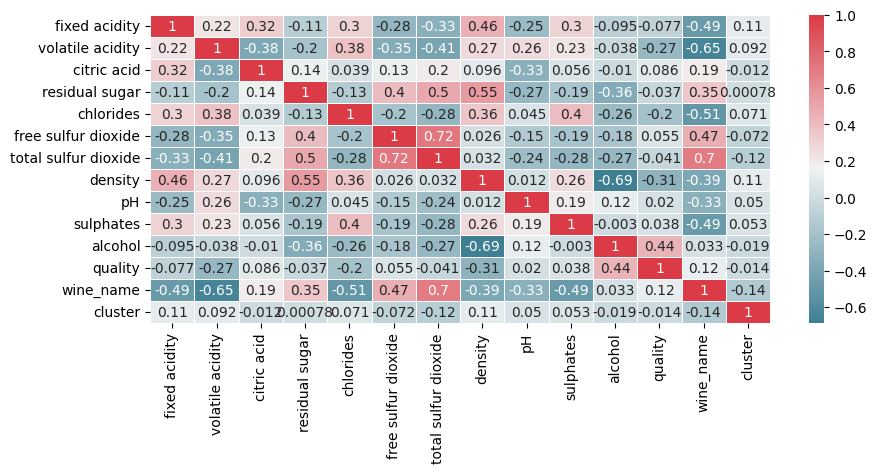

In [120]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(numeric_df.corr(), cmap=cmap, annot=True, linewidths=0.5)
plt.show()

###  *As it is visible from the matrix above that*
### *(residual sugar, density) = 0.84 and (alcohol, density) = -0.78 have strong corelations*

<Figure size 1000x1000 with 0 Axes>

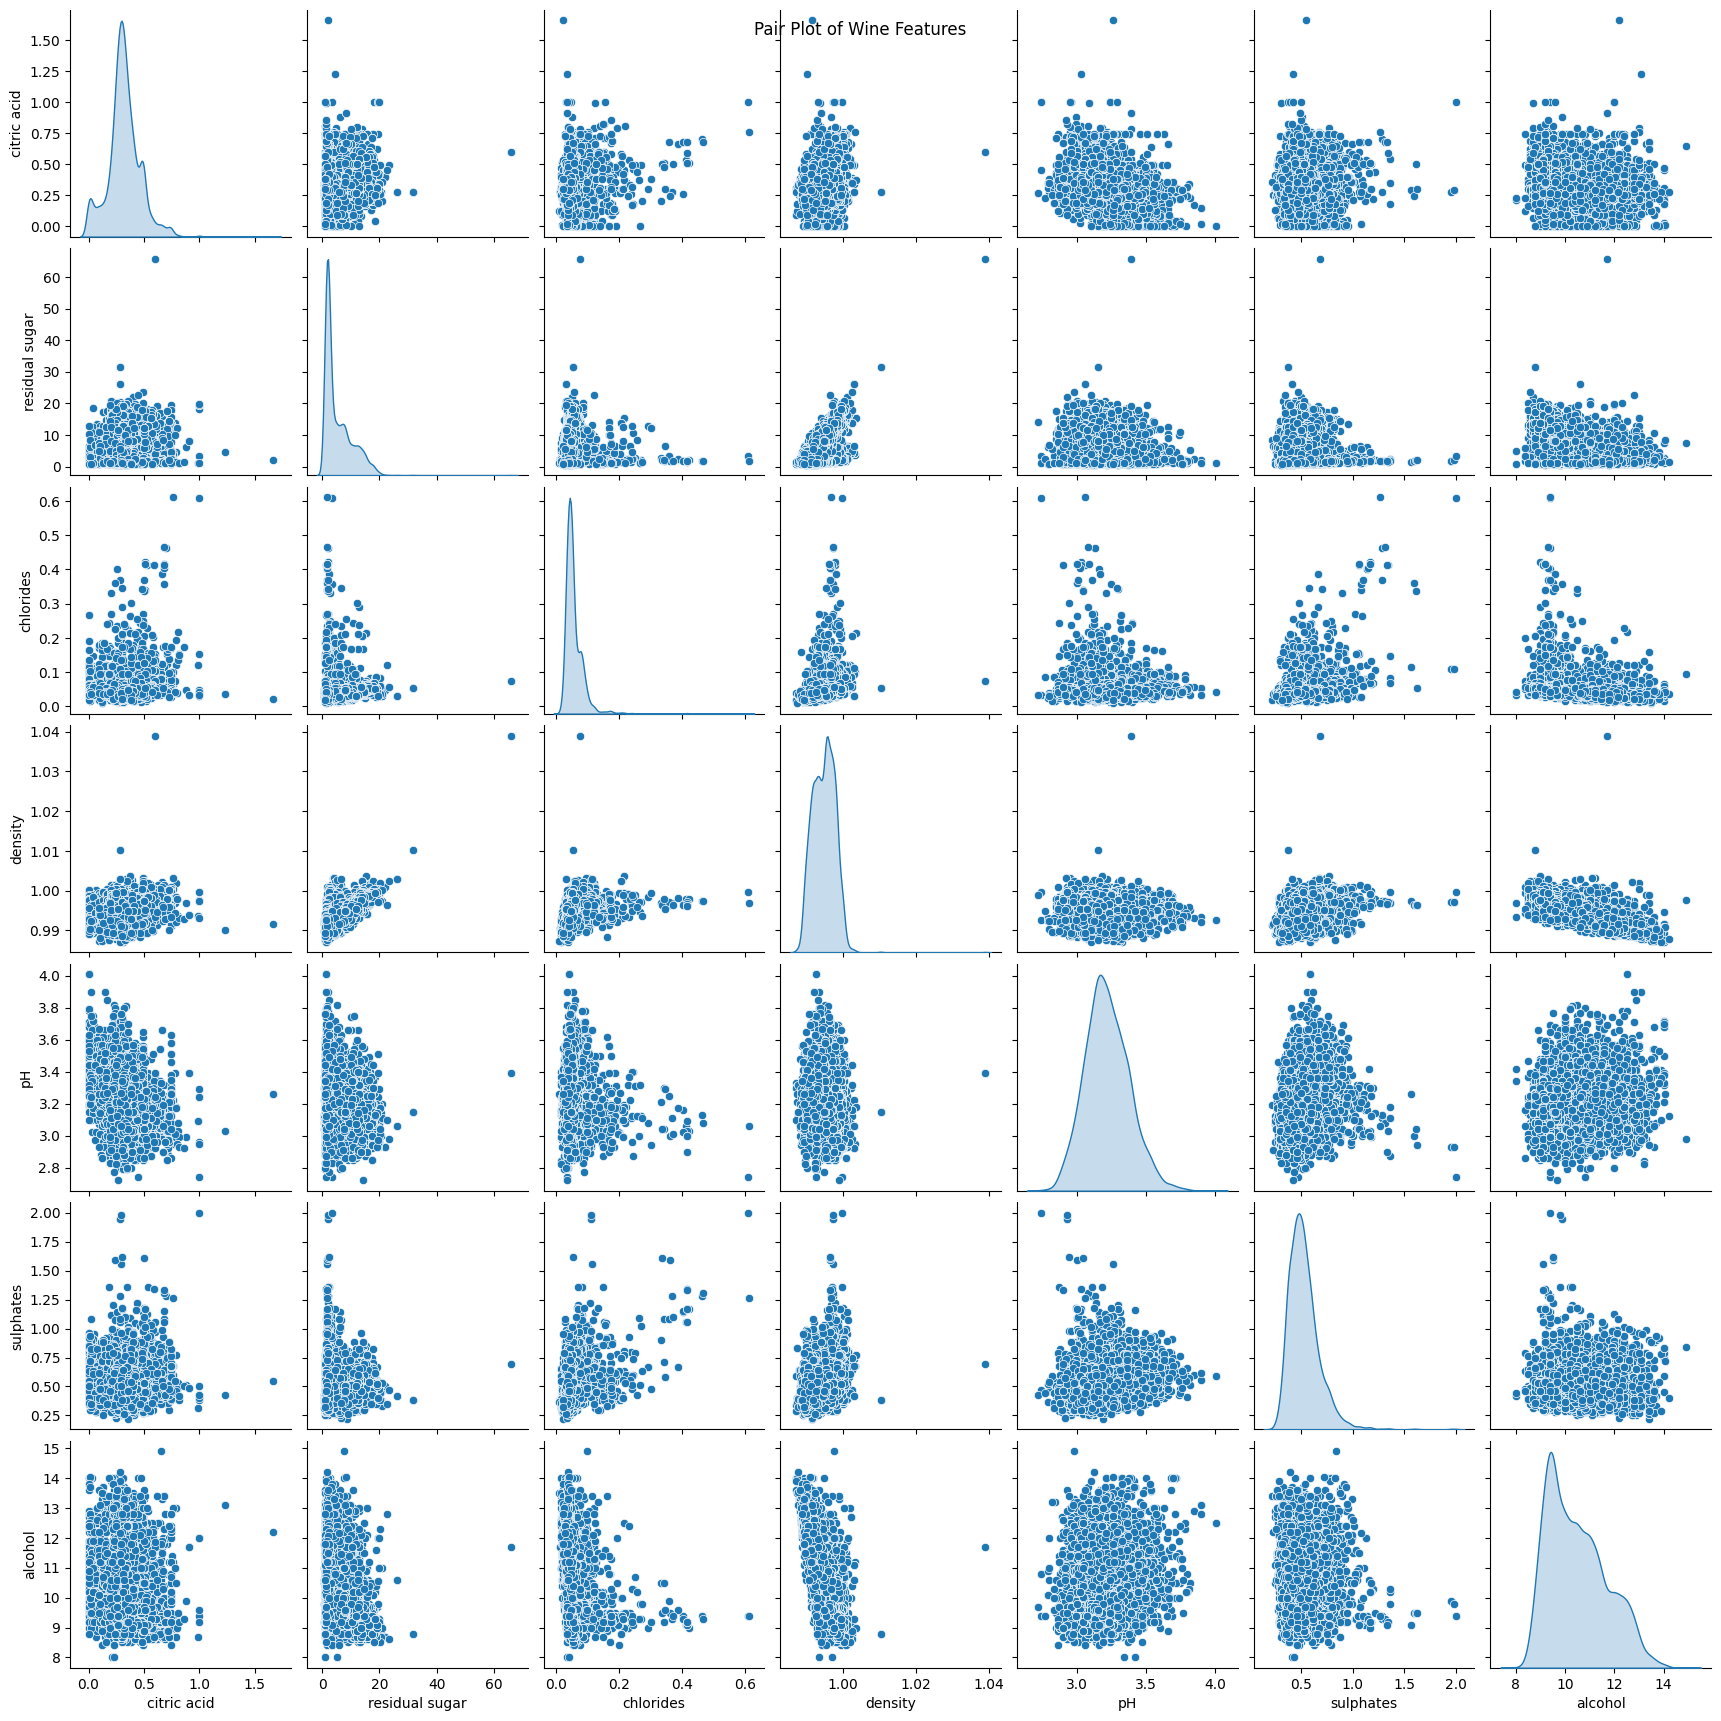

In [49]:
# Create a pair plot to see scatterplot between varuios features
plt.figure(figsize=(10, 10), dpi=100)
sns.pairplot(df[['citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']], diag_kind="kde", markers='o')
plt.suptitle("Pair Plot of Wine Features")
plt.show()

## *From the above pairplot, pH and alcohol seems good candidates for clustering as the data is spherical*

/var/folders/sg/0mhq7n352514_w3l2tm5gt0m0000gn/T/ipykernel_92059/2357723199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['pH', 'alcohol']] = scaler.transform(X)


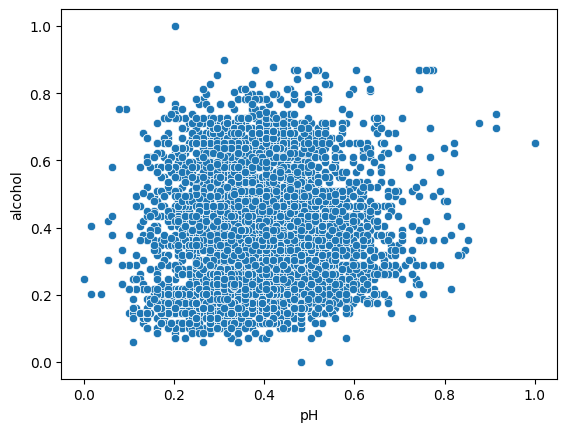

In [121]:
X = df[['pH', 'alcohol']]
scaler = MinMaxScaler()
scaler.fit(X)
X[['pH', 'alcohol']] = scaler.transform(X)
# X.head()


sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1])
# Add labels to the axes
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
# Show the plot
plt.show()

### Let us use k mean clustering with 3 clusters and see how the clusters look like

In [122]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=1000)
kmeans

KMeans(n_clusters=3, n_init=1000, random_state=0)

In [123]:
y_predict = kmeans.fit_predict(X)
y_predict

array([0, 2, 2, ..., 2, 1, 1], dtype=int32)

In [125]:
centroids = kmeans.cluster_centers_
centroids

array([[0.51756438, 0.32805491],
       [0.36586033, 0.56836636],
       [0.311906  , 0.22354857]])

/var/folders/sg/0mhq7n352514_w3l2tm5gt0m0000gn/T/ipykernel_92059/1334610623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.fit_predict(X)


<Axes: xlabel='pH', ylabel='alcohol'>

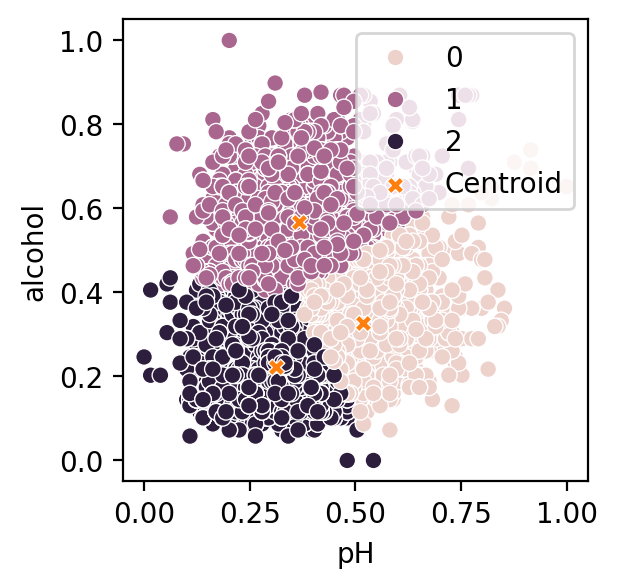

In [126]:
# Convert centroids to a DataFrame
centroids_df = pd.DataFrame(centroids, columns=["X", "Y"])
# Assuming you have already fit your KMeans model

X['cluster'] = kmeans.fit_predict(X)
# Add the centroids to the plot
plt.figure(figsize=(3, 3), dpi=200)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=X["cluster"])
sns.scatterplot(data=centroids_df, x="X", y="Y", marker='X', label='Centroid')

## Let's apply elbow Method for this 

In [127]:
sse = [] ## sum of squared errors
k_range = range(2,10)
score = []
for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init='auto')
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    score.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
score

[0.7005277954531772,
 0.8501561158883062,
 0.709011600792795,
 0.486013046646345,
 0.522496829932316,
 0.375596735455369,
 0.3404961698793878,
 0.3926258198175141]

[Text(0.5, 0, 'no of clusters'),
 Text(0, 0.5, 'SSE(Sum of squared error)'),
 Text(0.5, 1.0, 'sse vs number of clusters')]

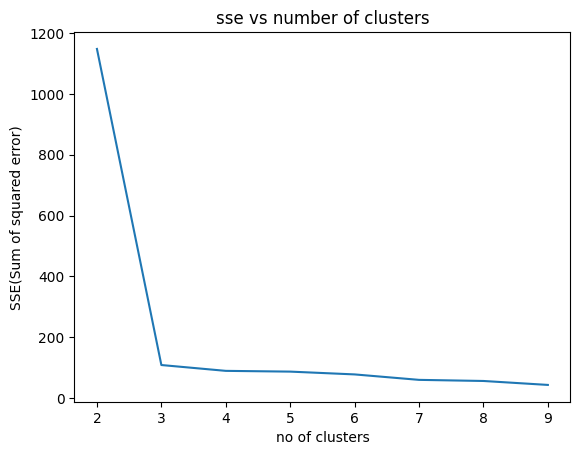

In [128]:
sseplot = sns.lineplot(x = k_range, y = sse)
sseplot.set(xlabel ="no of clusters", ylabel = "SSE(Sum of squared error)", title ="sse vs number of clusters")

### Elbow method here prove k = 3 is right but we should check with silhouette coefficient as well

In [129]:
silhouette_avg = silhouette_score(X, y_predict)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.8501561158883062


## Let's check the number of records in each cluster

/var/folders/sg/0mhq7n352514_w3l2tm5gt0m0000gn/T/ipykernel_92059/1918112021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=cluster_distribution, palette='Blues')


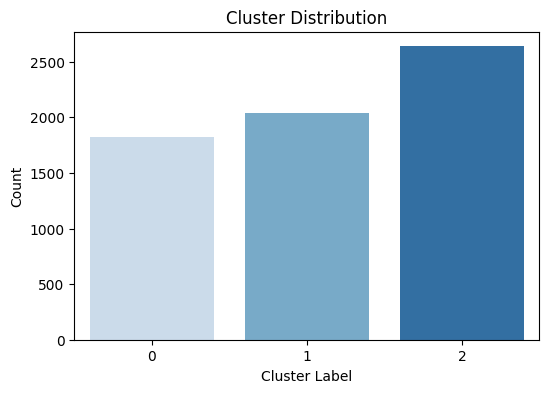

In [130]:
cluster_distribution = pd.DataFrame({'Predicted': y_predict})
plt.figure(figsize=(6, 4))
sns.countplot(x='Predicted', data=cluster_distribution, palette='Blues')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()

In [ ]:
### **CONCLUSION** 
### *As we can see elbow method suggested k = 3, For n_clusters = 3 The average silhouette_score is : 0.8305014959810723 which is highest.*
### *Also in the image below we can see that there are not negative values so it suggest that k = 3 is a good value and three clusters are of almost same sizes.*
![image.png](attachment:ef380ae5-6fce-45ba-acb9-1fff91749412.png)

## K-Mean Limitations
 >  Data that aren’t spherical or should not be spherical do not work well with k-means clustering
 
 >  It requires predefined number of clusters (K) which is challenging sometimes when we do not know much about the data.
 
 > Sensitive to outliers, as outliers can change of position of the cluster centroids so these outliers can heavily influecne the final clusters. 
 
 > Distance metric (e.g., Euclidean distance, Manhattan distance) can influcence the results so appropriate matric should be choosen according to the data and the problem. 
 
 > Numerical data only, may not work well on categorical or mixed data.
 

